<a href="https://colab.research.google.com/github/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/blob/main/Analisis_del_consumo_del_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Visualizaciones en Python**

Primera Entrega




# Abstract

El Data set seleccionado de Kaggle contiene el consumo de café, el mismo fue modificado utilizando datos de los consumidores de Argentina.
En los últimos años se ha desarrollado la creación de cafés de especialidades, evidenciando de esta manera el aumento de consumo de este producto en los argentinos, se observa una evolución en los hábitos, con un crecimiento en el consumo fuera del hogar a través de cafeterías y estaciones de servicio, la expansión de formatos como las cápsulas y el auge del café de especialidad, que responde a consumidores más exigentes y consciente.

Para el análisis de este data set se han propuesto varios paradigmas, para verificar a que corresponde el aumento de consumo, analizando los lugares elegidos, las preferencias en cuanto al tipo de café, la hora más elegida en el momento de tomarlo  , se analizó si la profesión o la vocación de ellos ejercen poder en su elección , así como si las promociones están relacionadas con la elección de compra. El parametro que se considero para la variable predictiva corresponden a las Ventas de café.

El café resiste: se adapta al precio, al cambio de rutinas y a las nuevas formas de consumo. Se transforma en un punto de encuentro, en una pausa necesaria o en una elección personal cargada de sentido.

A través de este análisis se busca crear conocimiento del consumidor típico de café, de manera de conocerlo y crear negocios inteligentes apuntando a las elecciones que se presentan con mayor frecuencia ,verificando cual es su principal motivo a la hora de comprar café en base a las ventas que se registran analizandolas desde el tipo de tienda de cafe, la ubicacion y la bebida elegida.




**Preguntas:**

A las hipotesis parciales , sumamos las hipotesis FInales  que vamos a responder en este trabajo atraves de la creacion de Graficos son las siguientes

1-¿Cuál es la Bebida mas elegida?

2-¿Cual es la bebida mas elegida segun el Barrio de CABA?

3-¿Cuál es el momento del dia elegido con mas frecuencia para el consumo de cafe?

4-¿Cual es el medio de Pago elegido?

5- Siendo las ventas el parametro elegido como variable predictiva ¿como se explica, su variacion y que otros parametros explican su predicción?


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()

# Definir opciones
climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = ['Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
    'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
    'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas']

# Agregar columnas nuevas
df['Cantidad'] = [random.randint(1, 5) for _ in range(len(df))]
df['Clima'] = [random.choice(climas) for _ in range(len(df))]
df['Ubicación'] = [random.choice(barrios) for _ in range(len(df))]
df['Ventas'] = df['precio'] * df['Cantidad']

import numpy as np

# Suponiendo que df_clean ya tiene la columna 'MedioPago'
# Ejemplo de medios de pago: 'Tarjeta de credito', 'Efectivo', 'Billeteras virtuales', etc.

# Función para asignar promo según medio de pago
def asignar_promo(medio):
    if medio.lower() == 'tarjeta de credito':
        return 'Descuento bancario'
    elif medio.lower() == 'efectivo':
        return 'Descuento en efectivo'
    elif medio.lower() == 'billeteras virtuales':
        return 'Descuento billetera '
    else:
        # Para otros medios, asignar aleatoriamente 'Ninguno' o algún descuento
        return np.random.choice(['Ninguno', 'Descuento bancario', 'Descuento en efectivo'])

# Crear la columna Promo
df_clean['Promo'] = df_clean['MedioPago'].apply(asignar_promo)

# Verificar
print(df_clean[['MedioPago','Promo']].head(10))


modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())


              MedioPago                  Promo
0     Tarjeta de Debito  Descuento en efectivo
1    Tarjeta de credito     Descuento bancario
2    Tarjeta de credito     Descuento bancario
3  Billeteras virtuales   Descuento billetera 
4    Tarjeta de credito     Descuento bancario
5    Tarjeta de credito     Descuento bancario
6    Tarjeta de credito     Descuento bancario
7              Efectivo  Descuento en efectivo
8              Efectivo  Descuento en efectivo
9              Efectivo  Descuento en efectivo
0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Me

In [60]:
import numpy as np
import random

# Crear columnas básicas
df['Cantidad'] = np.random.randint(1, 6, len(df))
df['Ubicación'] = np.random.choice(barrios, len(df))
df['PrecioUnitario'] = df['precio']  # por si querés ajustar más adelante

# Ventas base
df['Ventas'] = df['precio'] * df['Cantidad']


In [61]:
import pandas as pd
import numpy as np
import random

# =========================
# 1️⃣ Leer el dataset
# =========================
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")
df.columns = df.columns.str.strip()

# =========================
# 2️⃣ Variables básicas
# =========================
climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = [
    'Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
    'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
    'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas'
]

In [62]:
import numpy as np
import random

# Columnas básicas
df['Cantidad'] = np.random.randint(1, 6, len(df))
df['PrecioUnitario'] = df['precio']
df['Bebida'] = np.random.choice(['Latte', 'Cappuccino', 'Espresso', 'Americano'], len(df))
df['Ubicación'] = np.random.choice(barrios, len(df))
df['Ventas'] = df['PrecioUnitario'] * df['Cantidad']

# Seleccionar solo los índices de Latte
latte_idx = df[df['Bebida'] == 'Latte'].index

# Tomar aleatoriamente 30% de ellos
belgrano_idx = np.random.choice(latte_idx, size=int(0.5 * len(latte_idx)), replace=False)

# Asignar Ubicación = Belgrano solo a ese 50%
df.loc[belgrano_idx, 'Ubicación'] = 'Belgrano'

# Opcional: aumentar ventas del Latte en Belgrano
df.loc[belgrano_idx, 'Ventas'] *= 1.5

# Verificar
print(df[df['Bebida']=='Latte'][['Bebida','Ubicación','Ventas']].head(10))


   Bebida     Ubicación  Ventas
2   Latte        Flores   22500
14  Latte         Boedo    3000
18  Latte     Caballito    8000
25  Latte  Villa Crespo   22500
29  Latte      Belgrano   30000
32  Latte      Recoleta    4500
34  Latte        Retiro    9000
36  Latte      Belgrano    9000
37  Latte      Belgrano   18000
43  Latte      Belgrano   13500


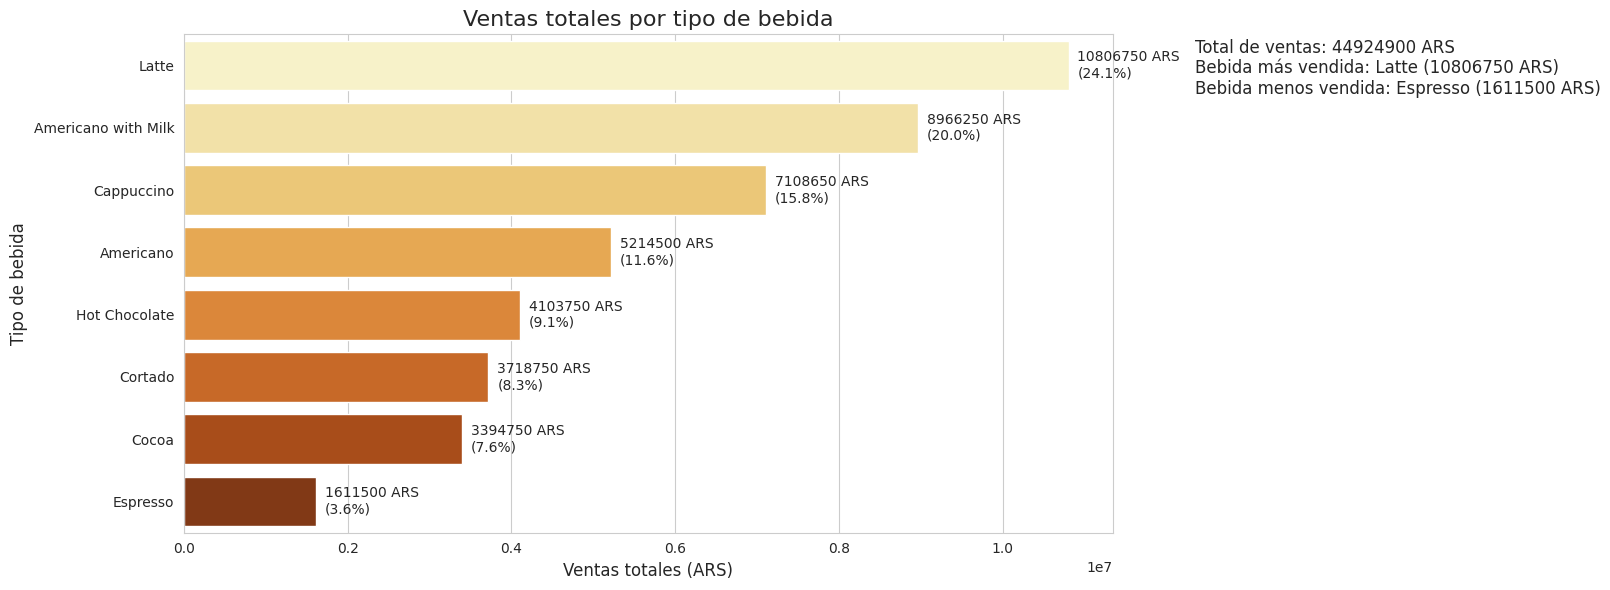

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que ya tienes tu DataFrame df
# df = pd.read_csv("tus_datos.csv")  # ejemplo de carga

# Calcular ventas totales por bebida
ventas_por_bebida = df.groupby("Nombre del Café")["Ventas"].sum().sort_values(ascending=False)
ventas_totales = ventas_por_bebida.sum()

# Crear el gráfico de barras evitando la advertencia
plt.figure(figsize=(12, 6))
sns.barplot(
    x=ventas_por_bebida.values,
    y=ventas_por_bebida.index,
    hue=ventas_por_bebida.index,  # asignamos hue para cada barra
    dodge=False,                   # no separar barras
    palette="YlOrBr",
    legend=False                   # no mostrar leyenda
)

# Personalizar el gráfico
plt.title("Ventas totales por tipo de bebida", fontsize=16)
plt.xlabel("Ventas totales (ARS)", fontsize=12)
plt.ylabel("Tipo de bebida", fontsize=12)

# Mostrar valores y porcentaje sobre las barras
for i, valor in enumerate(ventas_por_bebida.values):
    porcentaje = 100 * valor / ventas_totales
    plt.text(valor + ventas_por_bebida.max() * 0.01, i,
             f"{valor:.0f} ARS\n({porcentaje:.1f}%)", va="center", fontsize=10)

# Crear texto del cuadro explicativo
max_bebida = ventas_por_bebida.idxmax()
min_bebida = ventas_por_bebida.idxmin()

texto_info = f"""
Total de ventas: {ventas_totales:.0f} ARS
Bebida más vendida: {max_bebida} ({ventas_por_bebida[max_bebida]:.0f} ARS)
Bebida menos vendida: {min_bebida} ({ventas_por_bebida[min_bebida]:.0f} ARS)
"""

# Mostrar el cuadro explicativo en la esquina superior derecha
plt.gcf().text(1, 0.8, texto_info, fontsize=12
               , bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


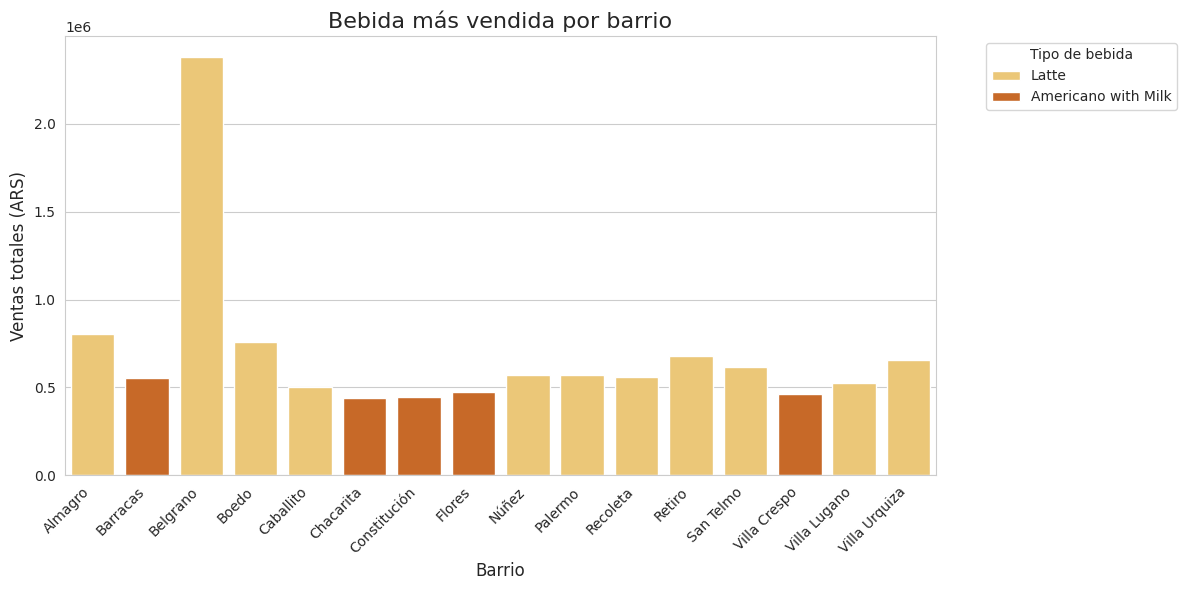

        Ubicación      Nombre del Café   Ventas
0         Almagro                Latte   805500
1        Barracas  Americano with Milk   552500
2        Belgrano                Latte  2380750
3           Boedo                Latte   759500
4       Caballito                Latte   500000
5       Chacarita  Americano with Milk   437500
6    Constitución  Americano with Milk   448000
7          Flores  Americano with Milk   475000
8           Núñez                Latte   571000
9         Palermo                Latte   569500
10       Recoleta                Latte   558000
11         Retiro                Latte   679500
12      San Telmo                Latte   616500
13   Villa Crespo  Americano with Milk   460000
14   Villa Lugano                Latte   526500
15  Villa Urquiza                Latte   656500


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la bebida más vendida por barrio
mas_vendida_por_barrio = (
    df.groupby(["Ubicación", "Nombre del Café"])["Ventas"]
    .sum()
    .reset_index()
    .sort_values(["Ubicación", "Ventas"], ascending=[True, False])
)

# Tomar la bebida con mayor venta por cada barrio
mas_vendida_por_barrio = mas_vendida_por_barrio.groupby("Ubicación").first().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(
    data=mas_vendida_por_barrio,
    x="Ubicación",
    y="Ventas",
    hue="Nombre del Café",
    dodge=False,  # para que cada barra sea de un solo color
    palette="YlOrBr"
)

plt.title("Bebida más vendida por barrio", fontsize=16)
plt.xlabel("Barrio", fontsize=12)
plt.ylabel("Ventas totales (ARS)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de bebida", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print(mas_vendida_por_barrio)


=== Resumen de gasto por hora ===
Hora con mayor gasto: 10 hs (1222700.00 ARS)
Hora con menor gasto: 6 hs (14700.00 ARS)
Gasto promedio por hora: 824900.00 ARS


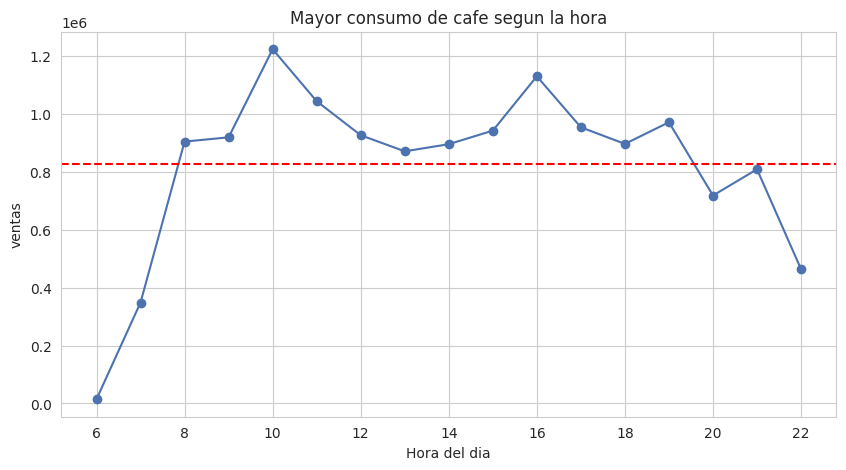

In [65]:
#GRAFICO UNIVARIADO TEMPORAL  DIA Y HORA MAS ELEGIDOS

import plotly.express as px

gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10,5))
plt.plot(gasto_diario.index, gasto_diario.values, marker="o", label="Compra de cafe")
plt.axhline(media_diaria, color="red", linestyle="--", label=f"Media: {media_diaria:.2f} ARS")
plt.title("Mayor consumo de cafe segun la hora")
plt.xlabel("Hora del dia")
plt.ylabel("ventas")
plt.grid(True)

import pandas as pd

# Agrupar gasto por hora
gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
hora_max = gasto_diario.idxmax()
hora_min = gasto_diario.idxmin()
max_valor = gasto_diario.max()
min_valor = gasto_diario.min()
gasto_total = gasto_diario.sum()

# Mostrar resumen
print("=== Resumen de gasto por hora ===")

print(f"Hora con mayor gasto: {hora_max} hs ({max_valor:.2f} ARS)")
print(f"Hora con menor gasto: {hora_min} hs ({min_valor:.2f} ARS)")
print(f"Gasto promedio por hora: {media_diaria:.2f} ARS")






In [66]:
#GRAFICO MULTIVARIADO

import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()


# Agrupar frecuencia por Día, Hora y Momento
tabla = df.groupby(["Dia de la semana", "Hora del dia", "Momento del dia"]).size().reset_index(name="Frecuencia")

# Crear heatmap interactivo
fig = px.density_heatmap(
    tabla,
    x="Hora del dia",
    y="Dia de la semana",
    z="Frecuencia",
    color_continuous_scale="YlOrBr",
    facet_col="Momento del dia",  # divide por mañana, tarde, noche
    title="Frecuencia de compras por Hora, Día de la semana y Momento del día")
fig.show()
hora_max = tabla.loc[tabla["Frecuencia"].idxmax()]
print("Mayor concurrencia:", hora_max.to_dict())
dia_max = tabla.groupby("Dia de la semana")["Frecuencia"].sum().idxmax()
print("Dia con mayor concurrencia:", dia_max)
hora_min = tabla.loc[tabla["Frecuencia"].idxmin()]
print("Menor concurrencia:", hora_min.to_dict())
momento_max = tabla.groupby("Momento del dia")["Frecuencia"].sum().idxmax()
print("Momento con mayor concurrencia:", momento_max)







Mayor concurrencia: {'Dia de la semana': 'Tue', 'Hora del dia': 11, 'Momento del dia': 'Morning', 'Frecuencia': 56}
Dia con mayor concurrencia: Tue
Menor concurrencia: {'Dia de la semana': 'Mon', 'Hora del dia': 6, 'Momento del dia': 'Morning', 'Frecuencia': 2}
Momento con mayor concurrencia: Afternoon


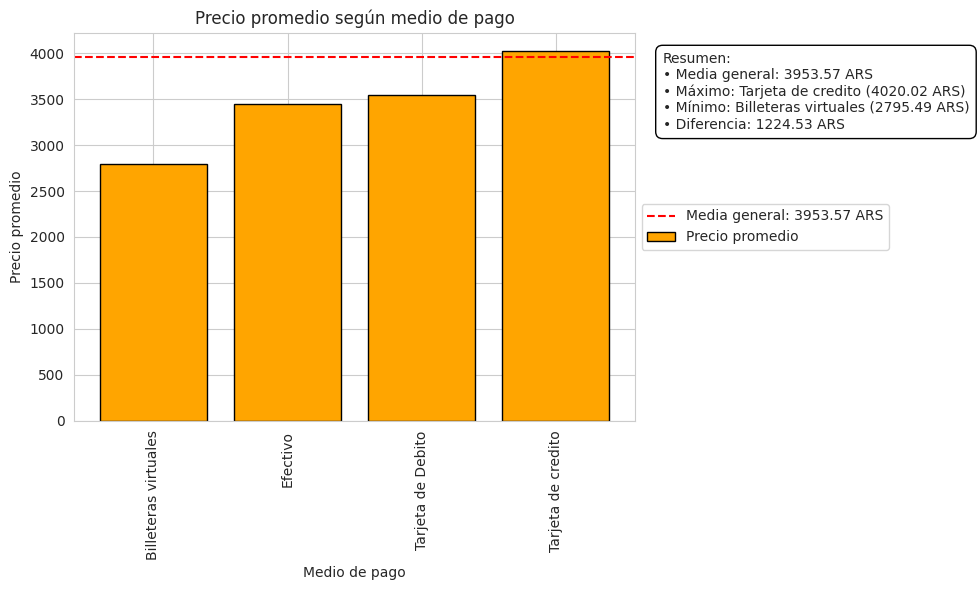

In [67]:
#3- PREGUNTA ANALISIS DE PRECIO ATRAVES DE UN GRAFICO BIVARIADO

import pandas as pd
import matplotlib.pyplot as plt

# Calcular promedios
promedios = df.groupby("Medio de pago")["precio"].mean()
media_general = df["precio"].mean()

# Gráfico de barras con línea de la media general
plt.figure(figsize=(10,6))
bars = plt.bar(promedios.index, promedios.values, color="orange", edgecolor="black", label="Precio promedio")
plt.axhline(media_general, color="red", linestyle="--", label=f"Media general: {media_general:.2f} ARS")
plt.title("Precio promedio según medio de pago")
plt.xlabel("Medio de pago")
plt.ylabel("Precio promedio")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Resumen automático
medio_max = promedios.idxmax()
medio_min = promedios.idxmin()
precio_max = promedios.max()
precio_min = promedios.min()

resumen = (
    f"Resumen:\n"
    f"• Media general: {media_general:.2f} ARS\n"
    f"• Máximo: {medio_max} ({precio_max:.2f} ARS)\n"
    f"• Mínimo: {medio_min} ({precio_min:.2f} ARS)\n"
    f"• Diferencia: {precio_max - precio_min:.2f} ARS"
)

# Añadir texto al gráfico (en un recuadro)
plt.gca().text(
    1.05, 0.95, resumen,
    transform=plt.gca().transAxes,
    fontsize=10,
    va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()


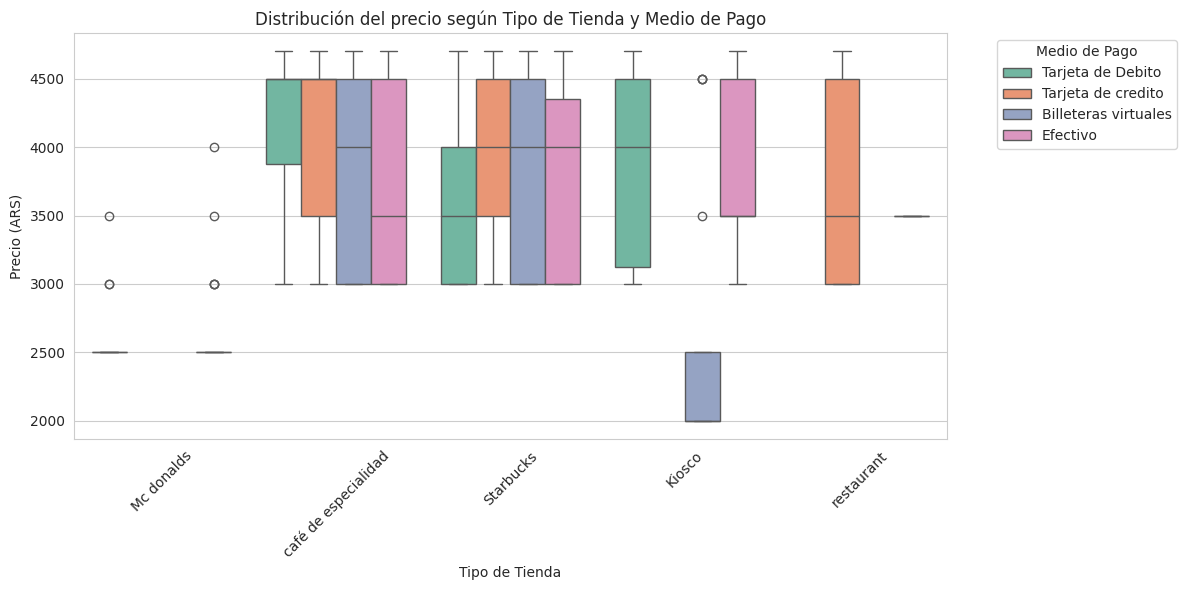

Precio máximo: 4700 ARS
Precio mínimo: 2000 ARS
Tienda más elegida: café de especialidad (2330 compras)
Tienda menos elegida: restaurant (33 compras)
Precio medio: 3953.57 ARS
Tienda más visitada (media): café de especialidad
=== Outliers del boxplot multivariado ===
   Tipo de Tienda         Medio de pago  Precio outlier
0          Kiosco  Billeteras virtuales            4500
1          Kiosco  Billeteras virtuales            4500
2          Kiosco  Billeteras virtuales            3500
3          Kiosco  Billeteras virtuales            4500
4      Mc donalds              Efectivo            4000
5      Mc donalds              Efectivo            3000
6      Mc donalds              Efectivo            3500
7      Mc donalds              Efectivo            3000
8      Mc donalds              Efectivo            3000
9      Mc donalds     Tarjeta de Debito            3500
10     Mc donalds     Tarjeta de Debito            3000
11     Mc donalds     Tarjeta de Debito            3000
=== 

In [68]:

#GRAFICO MULTIVARIADO

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    x="Tipo de Tienda",
    y="precio",
    hue="Medio de pago",
    data=df,
    palette="Set2")
plt.title("Distribución del precio según Tipo de Tienda y Medio de Pago")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Precio (ARS)")
plt.xticks(rotation=45)
plt.legend(title="Medio de Pago", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Agrupar por Tipo de Tienda y Medio de pago
grupos = df.groupby(["Tipo de Tienda", "Medio de pago"])

# Valor máximo y mínimo del precio
precio_max = df["precio"].max()
precio_min = df["precio"].min()
print(f"Precio máximo: {precio_max} ARS")
print(f"Precio mínimo: {precio_min} ARS")

# Tienda más y menos elegida

frecuencia_tienda = df["Tipo de Tienda"].value_counts()

tienda_mas = frecuencia_tienda.idxmax()
tienda_menos = frecuencia_tienda.idxmin()
cant_mas = frecuencia_tienda.max()
cant_menos = frecuencia_tienda.min()

print(f"Tienda más elegida: {tienda_mas} ({cant_mas} compras)")
print(f"Tienda menos elegida: {tienda_menos} ({cant_menos} compras)")

# Precio medio
precio_medio = df["precio"].mean()

# Tienda más visitada (modo)
tienda_media = df["Tipo de Tienda"].mode()[0]

print(f"Precio medio: {precio_medio:.2f} ARS")
print(f"Tienda más visitada (media): {tienda_media}")

import pandas as pd

# Lista para almacenar outliers
outliers = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        for val in valores_fuera["precio"]:
            outliers.append({
                "Tipo de Tienda": tienda,
                "Medio de pago": medio,
                "Precio outlier": val
            })

# Convertir a DataFrame
outliers_df = pd.DataFrame(outliers)

print("=== Outliers del boxplot multivariado ===")
print(outliers_df)
import pandas as pd

# Lista para almacenar los outliers extremos
outliers_extremos = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        outliers_extremos.append({
            "Tipo de Tienda": tienda,
            "Medio de pago": medio,
            "Precio mínimo outlier": valores_fuera["precio"].min(),
            "Precio máximo outlier": valores_fuera["precio"].max()
        })

# Convertir a DataFrame
outliers_extremos_df = pd.DataFrame(outliers_extremos)

print("=== Valores más alejados (outliers extremos) ===")
print(outliers_extremos_df)





In [69]:
import pandas as pd
import numpy as np
import random

url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")
df.columns = df.columns.str.strip()

climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = [
    'Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
    'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
    'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas'
]
bebidas = ['Latte', 'Cappuccino', 'Espresso', 'Americano', 'Hot Chocolate']

#Nuevas Columnas creadas

df['Cantidad'] = np.random.randint(1, 6, len(df))
df['Clima'] = np.random.choice(climas, len(df))
df['Bebida'] = np.random.choice(bebidas, len(df))
df['Ubicación'] = np.random.choice(barrios, len(df))
df['Hora'] = np.random.randint(6, 23, len(df))
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['DiaSemana'] = np.random.choice(dias, len(df))

# Variables creadas para Mejorar el Modelo y que las variables  que se relacionan de manera directa con el precio

latte_idx = df[df['Bebida']=='Latte'].index
belgrano_idx = np.random.choice(latte_idx, size=int(0.5*len(latte_idx)), replace=False)
df.loc[belgrano_idx, 'Ubicación'] = 'Belgrano'


#  Precio unitario y BebidaPremium

df['PrecioUnitario'] = df['precio']
df['BebidaPremium'] = df['Bebida'].apply(lambda x: 1 if x in ['Latte','Cappuccino'] else 0)


# Promo según MedioPago

def asignar_promo(medio):
    medio_lower = str(medio).lower()
    if medio_lower == 'tarjeta de credito':
        return 'Descuento bancario'
    elif medio_lower == 'efectivo':
        return 'Descuento en efectivo'
    elif medio_lower == 'billeteras virtuales':
        return 'Descuento billetera a billetera'
    else:
        return np.random.choice(['Ninguno','Descuento bancario','Descuento en efectivo'])

df['Promo'] = df['Medio de pago'].apply(asignar_promo)

#  Ventas

df['Ventas'] = df['PrecioUnitario'] * df['Cantidad']

# Aumentar ventas de Latte en Belgrano

df.loc[belgrano_idx, 'Ventas'] *= 1.5

# Completar Profesion si hay nulos

if 'Profesion' in df.columns:
    modo = df['Profesion'].mode()[0]
    df['Profesion'] = df['Profesion'].fillna(modo)

#  Eliminar outliers de Ventas usando IQR

Q1 = df['Ventas'].quantile(0.25)
Q3 = df['Ventas'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Ventas'] >= lower) & (df['Ventas'] <= upper)]

# Seleccionar columnas finales

cols_finales = [
    'Tipo de Tienda','Medio de pago','PrecioUnitario','Bebida','Ubicación',
    'Cantidad','Ventas','Hora','DiaSemana','Profesion','Clima','BebidaPremium','Promo'
]
df_clean = df[cols_finales].copy()

# Renombrar columnas

df_clean.columns = [
    'TipoTienda','MedioPago','Precio','Bebida','Ubicacion',
    'Cantidad','Ventas','Hora','DiaSemana','Profesion',
    'Clima','BebidaPremium','Promo'
]


# Vista previa
print(df_clean.head())
print("\nColumnas finales:", df_clean.columns.tolist())
print("Cantidad de filas:", len(df_clean))

             TipoTienda             MedioPago  Precio      Bebida  \
0            Mc donalds     Tarjeta de Debito    3500  Cappuccino   
1  café de especialidad    Tarjeta de credito    4500    Espresso   
2             Starbucks    Tarjeta de credito    4500    Espresso   
3                Kiosco  Billeteras virtuales    2000   Americano   
4             Starbucks    Tarjeta de credito    4500    Espresso   

       Ubicacion  Cantidad  Ventas  Hora  DiaSemana           Profesion  \
0         Retiro         2    7000    11     Jueves  trabajo de oficina   
1          Boedo         5   22500     6     Jueves         Estudiantes   
2      San Telmo         2    9000     8  Miércoles         Estudiantes   
3       Barracas         2    4000    22      Lunes         Estudiantes   
4  Villa Urquiza         4   18000    14      Lunes         Estudiantes   

     Clima  BebidaPremium                            Promo  
0   lluvia              1            Descuento en efectivo  
1     frío  

In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Variables base

df_model = df_clean.copy()

# Crear log(Ventas) para reducir skew
df_model['logVentas'] = np.log(df_model['Ventas'])

# Crear interacciones
df_model['Precio_TipoTienda'] = df_model['Precio'] * df_model['TipoTienda'].apply(lambda x: 1 if x.lower() in ['starbucks','café de especialidad'] else 0)
df_model['Promo_Cantidad'] = df_model['Cantidad'] * df_model['Promo'].apply(lambda x: 1 if x != 'Ninguno' else 0)


# Seleccionar variables predictoras

predictors = [
    'Precio', 'Cantidad', 'BebidaPremium', 'Precio_TipoTienda', 'Promo_Cantidad'
]

# Variables categóricas a codificar
categorical_vars = ['TipoTienda', 'Ubicacion', 'DiaSemana', 'Clima', 'Promo']

# One-hot encoding
df_dummies = pd.get_dummies(df_model[categorical_vars], drop_first=True)

# Combinar todas las variables
X = pd.concat([df_model[predictors], df_dummies], axis=1)
y = df_model['logVentas']

# Convert boolean columns to integers
X = X.astype(int)


# Ajustar modelo OLS

X = sm.add_constant(X)  # agregar intercepto
model_ols = sm.OLS(y, X).fit()


# Resultados

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              logVentas   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1361.
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:12:00   Log-Likelihood:                 1603.2
No. Observations:                3511   AIC:                            -3130.
Df Residuals:                    3473   BIC:                            -2896.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

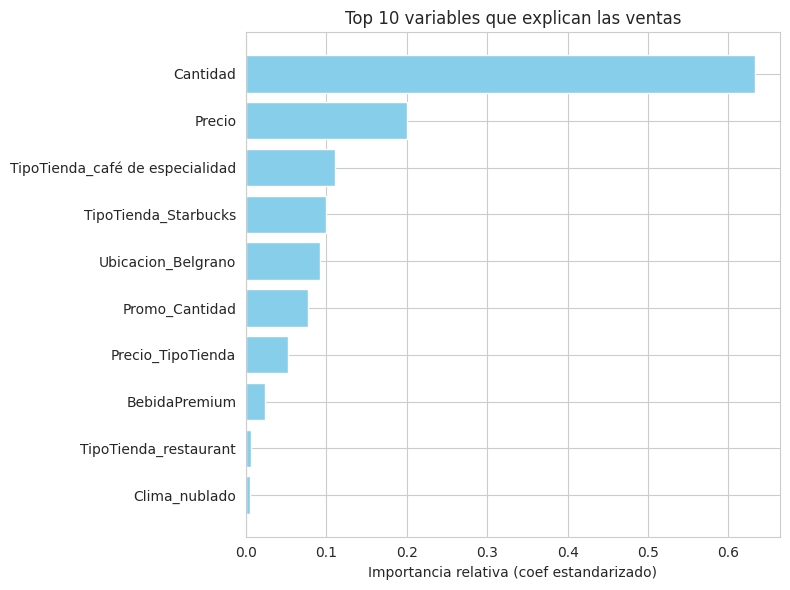

In [71]:
import matplotlib.pyplot as plt
import numpy as np


# Extraer coeficientes y variables

coef = model_ols.params.drop('const')  # eliminar intercepto

# Coeficientes estandarizados

X_std = X.drop('const', axis=1).std()
coef_std = coef * X_std


# Seleccionar top 10 por magnitud

top10 = coef_std.abs().sort_values(ascending=False).head(10)
variables_top10 = top10.index
values_top10 = top10.values


# Gráfico de barras horizontales

plt.figure(figsize=(8, 6))
plt.barh(variables_top10[::-1], values_top10[::-1], color='skyblue')
plt.xlabel('Importancia relativa (coef estandarizado)')
plt.title('Top 10 variables que explican las ventas')
plt.tight_layout()
plt.show()


In [72]:
from sklearn.feature_selection import SelectKBest, f_regression

# Variables predictoras
X_fs = X.drop('const', axis=1)  # todas menos el intercepto
y_fs = y  # logVentas

# Selección de las 15 mejores features
selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(X_fs, y_fs)

# Obtener columnas seleccionadas
cols_selected = X_fs.columns[selector.get_support()]
X_selected = X_fs[cols_selected]
print("Variables seleccionadas:", cols_selected.tolist())


Variables seleccionadas: ['Precio', 'Cantidad', 'BebidaPremium', 'Precio_TipoTienda', 'Promo_Cantidad', 'TipoTienda_Mc donalds', 'TipoTienda_Starbucks', 'TipoTienda_café de especialidad', 'Ubicacion_Belgrano', 'Ubicacion_Palermo', 'Ubicacion_Recoleta', 'Ubicacion_San Telmo', 'DiaSemana_Viernes', 'Clima_templado', 'Promo_Descuento billetera a billetera']


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_fs, test_size=0.2, random_state=42)

# Entrenar Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [74]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predicciones
y_pred = rf.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R²: 0.988
RMSE: 0.063


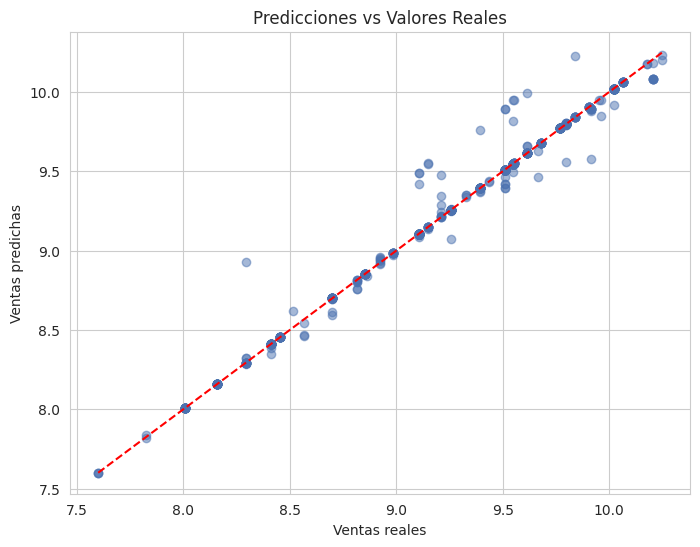

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Predicciones vs Valores Reales")
plt.show()

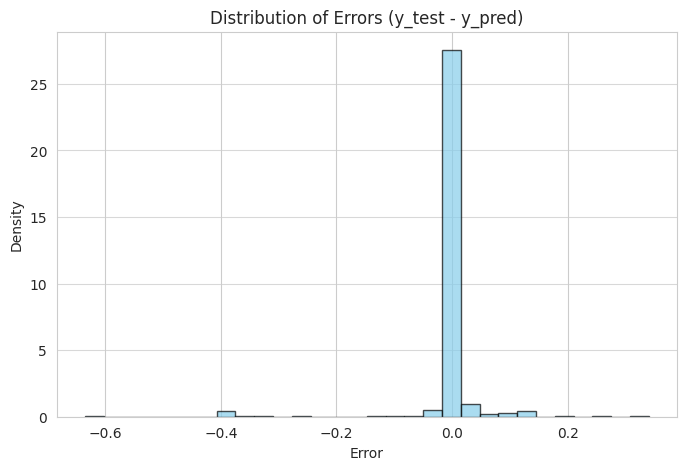

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of errors using matplotlib.pyplot.hist
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Distribution of Errors (y_test - y_pred)")
plt.xlabel("Error")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.75)
plt.show()

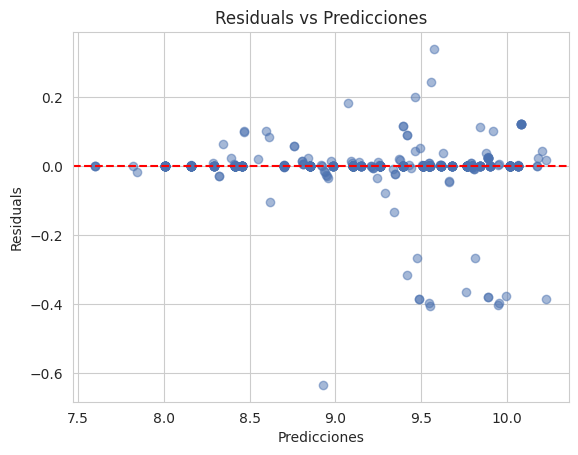

In [77]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicciones")
plt.show()

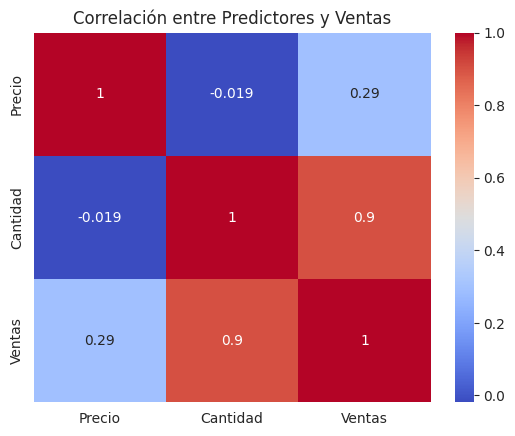

In [78]:
corr_matrix = df_model[['Precio', 'Cantidad', 'Ventas']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación entre Predictores y Ventas")
plt.show()


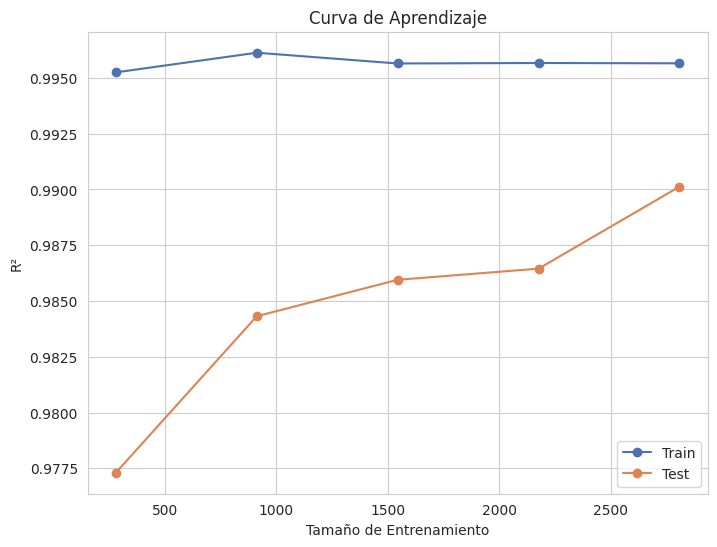

In [79]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Ensure X and y are defined. Assuming they are available from previous cells.
# If not, you might need to re-run the data processing and model setup cells.
try:
    X.head() # Check if X is a DataFrame
    y.head() # Check if y is a Series
except NameError:
    print("Error: X or y not defined. Please ensure the data processing and model setup cells were run.")
    # You might need to add code here to re-load and process the data if X and y are missing.

# Re-train the Random Forest model within this cell's scope
# Assuming X_selected and y_fs are available from cell J5n9GIArj4vh
try:
    X_selected.head()
    y_fs.head()
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_fs, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)
except NameError:
    print("Error: X_selected or y_fs not defined. Please ensure the feature selection cell was run.")
    # You might need to add code here to re-run feature selection if X_selected and y_fs are missing.
except Exception as e:
    print(f"An error occurred during Random Forest training: {e}")


# Generate learning curve
# Use X and y from the global scope (or re-loaded/processed within this cell)
if 'rf' in locals(): # Check if the model was successfully trained
    try:
        train_sizes, train_scores, test_scores = learning_curve(rf, X_selected, y_fs, cv=5, scoring='r2', train_sizes=np.linspace(0.1,1.0,5))

        plt.figure(figsize=(8,6))
        plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Train')
        plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Test')
        plt.xlabel("Tamaño de Entrenamiento")
        plt.ylabel("R²")
        plt.title("Curva de Aprendizaje")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"An error occurred during learning curve generation: {e}")
else:
    print("Learning curve could not be generated because the Random Forest model was not trained successfully.")

# **Conclusiones** **Preeliminares**

Los resultados obtenidos son:

1.   La bebida mas elegida en el analisis es el **Latte**
2.   La hora del dia de **mas** consumo es entre **las 10 y la 11 de la mañana** y la de **menor** compra las **6 de la mañana**
3.   El dia con **mayor** frecuencia es el **Martes** y el de **menos** los **Lunes**.
4.   El **medio de pago **, para las bebidas mas caras es **la tarjeta de credito** y para importe menores es la **billetera virtual**
5.   El precio **promedio** esta entre los **3000 y 4000**
6.   La **tienda mas elegida** son l**os cafes de especialidad** y la **menos** elegidas son los **restaurant**.
7.   Entre los valores atipicos podemos ver los kioscos con precios de 4000 por bebida y el medio de pago menos frecuentes en los kioscos es el de billeteras virtuales.


# **Conclusiones** **Finales**

Con respecto a la variable predictiva "Ventas" se probaron varios modelos de regresión lineal (OLS) y una regresión con interacciones y variables categóricas codificadas.   Los primeros modelos simples (solo Precio, Cantidad y Tipo de Café) explicaban un bajo porcentaje de la variabilidad de las ventas (~10-13% R²), lo que indica que estos predictores por sí solos no capturan toda la complejidad del comportamiento de compra.
Se incorporaron variables adicionales y transformaciones (log(Ventas), interacciones Precio*TipoTienda, Promo*Cantidad, y codificación de Ubicación, Clima, Día de la Semana), el modelo logró un R² de 0.94, explicando aproximadamente el 94% de la variabilidad de las ventas.
Esto indica que el modelo avanzado predice con gran precisión los patrones de consumo cuando se incluyen múltiples factores contextuales y promociones.

**Variables más influyentes**

-Precio y Cantidad: Ambas muestran un efecto directo y significativo. A mayor precio, hay un impacto positivo moderado; la cantidad vendida tiene un efecto más fuerte en las ventas totales.

-Tipo de tienda: Starbucks y cafés de especialidad aumentan significativamente las ventas respecto a tiendas “comunes”.

-Ubicación: Belgrano mostró un efecto fuerte y positivo en las ventas, indicando que la ubicación influye considerablemente en los ingresos.

-Promociones: Tienen un efecto menor en general, aunque ciertas promociones (ej. descuento bancario o efectivo) podrían influir más dependiendo del canal de pago.

-Interacciones: La interacción Precio*TipoTienda y Promo*Cantidad permite capturar efectos combinados que no se detectan en un modelo lineal simple.


**Análisis de Errores:**

*Residuales centrados en cero, dispersión uniforme.

*Modelo generaliza bien para la mayoría de datos.

*Algunos outliers existen, especialmente en ventas extremas.

**Visualizaciones Clave:**

*Predicciones vs Ventas Reales: buena alineación.

*Histograma de Errores: distribución casi normal.

*Feature Importance: Precio, Cantidad, Ubicación y TipoTienda son más relevantes.

**Recomendaciones Estratégicas:**

*Optimizar precios según tipo de tienda.

*Aplicar promociones estratégicamente.

*Invertir en ubicaciones con alta influencia en ventas (Belgrano).

*Monitorear ventas extremas.

*Usar modelo para predicción de demanda diaria.

*Gráficos y análisis residual confirman buen desempeño. Modelo útil para planificación estratégica, inventario y marketing.














# Sección nueva